### DATA 301   Spring 2016

### Joel Braun            jsbraun@calpoly.edu
### James Ly              jly03@calpoly.edu
### Avinash Sharma  avsharma@calpoly.edu

### Final Project

### Pricing American Options by Simulation: A Comparison of Methods

In [1]:
## imports
%matplotlib inline

import numpy as np
import analysisfuncs as af
import matplotlib 
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

In [2]:
## parse data into dictionaries

simCallsDict = af.parseSimCalls("simcalls6M.csv")
simPutsDict = af.parseSimPuts("simputs6M.csv")

## Call Options Dataset
### Question 1: Black-Scholes vs. Binomial
### Which options pricing class provides better accuracy?

<b>black-scholes accuracies</b>

In [3]:
## create lists to run accuracy functions on
bsNames = ['Barone-Adesi Whaley', 'Bjerksund-Stensland']
bsReal = []
bsEstimates = []
bsSSE = []
bsAvgSSE = []
bsTAcc = []
bsSAcc = []

## Barone-Adesi Whaley 
baroneReal, baroneEstimates = af.getRealEstimates(simCallsDict, 2)
bsReal.append(baroneReal)
bsEstimates.append(baroneEstimates)

## Bjerksund-Stensland 
bjerksundReal, bjerksundEstimates = af.getRealEstimates(simCallsDict, 3)
bsReal.append(bjerksundReal)
bsEstimates.append(bjerksundEstimates)

## run accuracy functions on black-scholes estimates
epsilon = 0.1
for i in range(len(bsNames)):
    print(bsNames[i])
    bsSSE.append(af.sse(bsEstimates[i], bsReal[i]))
    bsAvgSSE.append(af.avgSSE(bsEstimates[i], bsReal[i]))
    bsTAcc.append(af.thresholdAcc(bsEstimates[i], bsReal[i], epsilon))
    bsSAcc.append(af.sentimentAcc(bsEstimates[i], bsReal[i]))
    print("sse:",bsSSE[i])
    print("avg sse:",bsAvgSSE[i])
    print("threshold acc:", bsTAcc[i],"%")
    print("sentiment acc:", bsSAcc[i],"%\n")

Barone-Adesi Whaley
sse: 23672.7293406
avg sse: 26.7488467126
threshold acc: 2.711864406779661 %
sentiment acc: 100.0 %

Bjerksund-Stensland
sse: 23672.7293406
avg sse: 26.7488467126
threshold acc: 2.711864406779661 %
sentiment acc: 100.0 %



#### Visualizations of Black-Scholes Accuracies

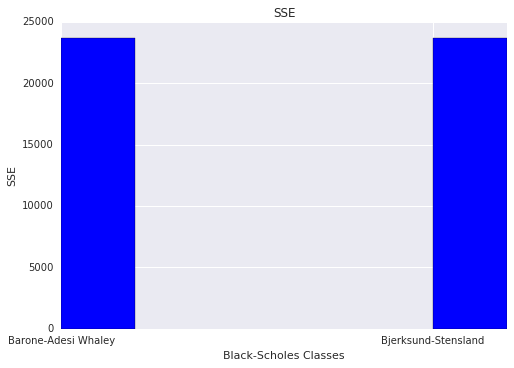

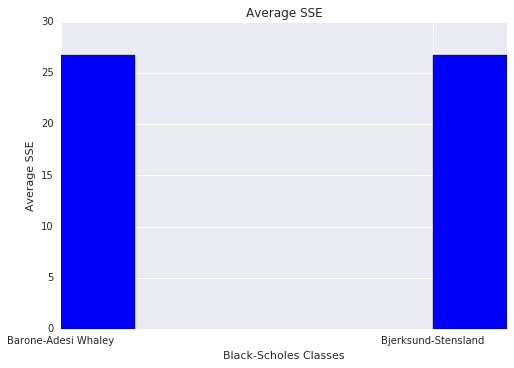

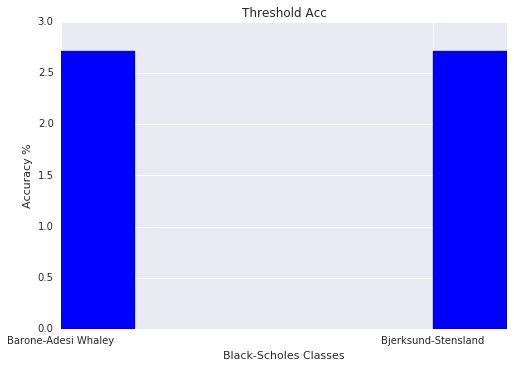

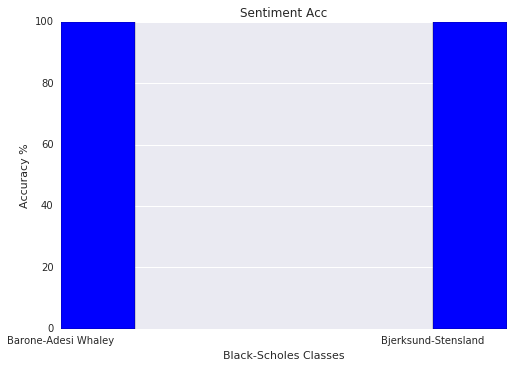

In [4]:
## set up for histograms
names = ()
sse = ()
avgSSE = ()
tAcc = ()
sAcc = ()
for i in range(len(bsNames)):
    names += (bsNames[i],)
    sse += (bsSSE[i],)
    avgSSE += (bsAvgSSE[i],)
    tAcc += (bsTAcc[i],)
    sAcc += (bsSAcc[i],)

width = 0.2
i = np.arange(len(bsNames))


## plot histogram for SSE
fig, plot = plt.subplots()
bar = plot.bar(i, sse, width, color='b')
plot.set_title('SSE')
plot.set_xlabel('Black-Scholes Classes')
plot.set_ylabel('SSE')
plot.set_xticklabels(names)
plot.set_xticks(i)
plt.show()

## plot histogram for Average SSE
fig, plot = plt.subplots()
bar = plot.bar(i, avgSSE, width, color='b')
plot.set_title('Average SSE')
plot.set_xlabel('Black-Scholes Classes')
plot.set_ylabel('Average SSE')
plot.set_xticklabels(names)
plot.set_xticks(i)
plt.show()

## plot histogram for threshold accuracy
fig, plot = plt.subplots()
bar = plot.bar(i, tAcc, width, color='b')
plot.set_title('Threshold Acc')
plot.set_xlabel('Black-Scholes Classes')
plot.set_ylabel('Accuracy %')
plot.set_xticklabels(names)
plot.set_xticks(i)
plt.show()

#plot histogram for sentiment accuracy
fig, plot = plt.subplots()
bar = plot.bar(i, sAcc, width, color='b')
plot.set_title('Sentiment Acc')
plot.set_xlabel('Black-Scholes Classes')
plot.set_ylabel('Accuracy %')
plot.set_xticklabels(names)
plot.set_xticks(i)
plt.show()

<b>Bionomial Accuracies</b>

In [5]:
## create lists to run accuracy functions on
binNames = ['Cox-Ross-Rubenstein', 'Jarrow-Rudd', 'Equal Probabilities','Trigeorgis','Tian','Leisen-Reimer']
binReal = []
binEstimates = []
binSSE = []
binAvgSSE = []
binTAcc = []
binSAcc = []

## Cox-Ross-Rubenstein 
coxReal, coxEstimates = af.getRealEstimates(simCallsDict, 4)
binReal.append(coxReal)
binEstimates.append(coxEstimates)


## Jarrow-Rudd 
jarrowReal, jarrowEstimates = af.getRealEstimates(simCallsDict, 5)
binReal.append(jarrowReal)
binEstimates.append(jarrowEstimates)


## Equal Probabilities 
equalReal, equalEstimates = af.getRealEstimates(simCallsDict, 6)
binReal.append(equalReal)
binEstimates.append(equalEstimates)

## Trigeorgis 
trigeorgisReal, trigeorgisEstimates = af.getRealEstimates(simCallsDict, 7)
binReal.append(trigeorgisReal)
binEstimates.append(trigeorgisEstimates)


## Tian 
tianReal, tianEstimates = af.getRealEstimates(simCallsDict, 8)
binReal.append(tianReal)
binEstimates.append(tianEstimates)


## Leisen-Reimer 
leisenReal, leisenEstimates = af.getRealEstimates(simCallsDict, 9)
binReal.append(leisenReal)
binEstimates.append(leisenEstimates)

## run accuracy functions on real and estimate prices
epsilon = 0.1
for i in range(len(binNames)):
    print(binNames[i])
    binSSE.append(af.sse(binEstimates[i], binReal[i]))
    binAvgSSE.append(af.avgSSE(binEstimates[i], binReal[i]))
    binTAcc.append(af.thresholdAcc(binEstimates[i], binReal[i], epsilon))
    binSAcc.append(af.sentimentAcc(binEstimates[i], binReal[i]))
    print("sse:",binSSE[i])
    print("avg sse:",binAvgSSE[i])
    print("threshold acc:", binTAcc[i],"%")
    print("sentiment acc:", binSAcc[i],"%\n")

Cox-Ross-Rubenstein
sse: 23674.3562108
avg sse: 26.7506849839
threshold acc: 2.711864406779661 %
sentiment acc: 100.0 %

Jarrow-Rudd
sse: 23674.5639832
avg sse: 26.750919755
threshold acc: 2.711864406779661 %
sentiment acc: 100.0 %

Equal Probabilities
sse: 23709.3509718
avg sse: 26.7902270867
threshold acc: 2.711864406779661 %
sentiment acc: 100.0 %

Trigeorgis
sse: 23674.8455342
avg sse: 26.7512378918
threshold acc: 2.711864406779661 %
sentiment acc: 100.0 %

Tian
sse: 23673.9834955
avg sse: 26.7502638367
threshold acc: 2.711864406779661 %
sentiment acc: 100.0 %

Leisen-Reimer
sse: 23672.7277183
avg sse: 26.7488448795
threshold acc: 2.711864406779661 %
sentiment acc: 100.0 %



#### Visualizations of Binomial Accuracies

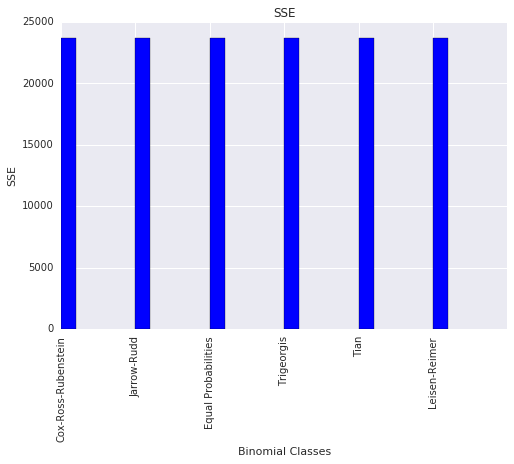

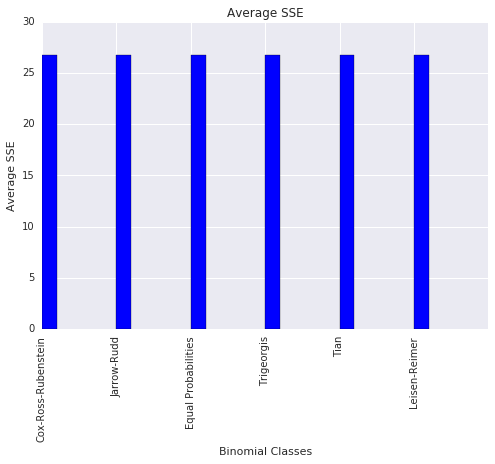

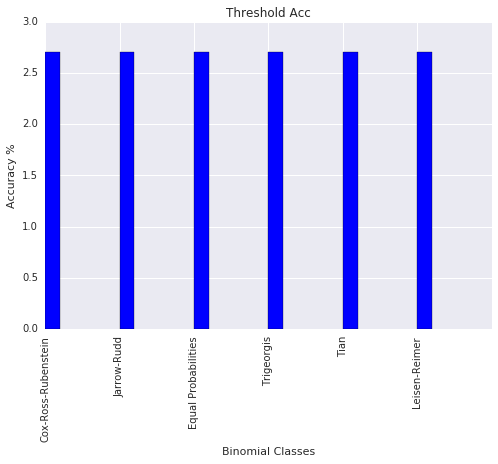

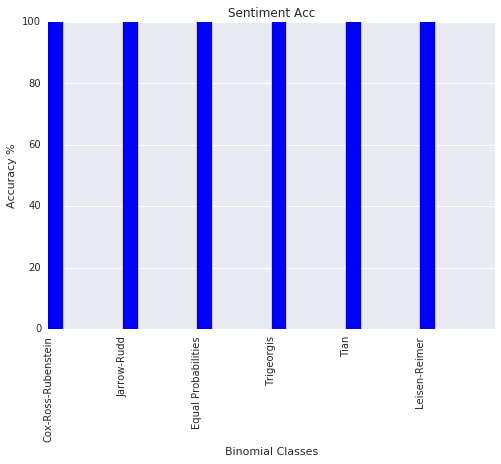

In [6]:
## set up for histograms
names = ()
sse = ()
avgSSE = ()
tAcc = ()
sAcc = ()
for i in range(len(binNames)):
    names += (binNames[i],)
    sse += (binSSE[i],)
    avgSSE += (binAvgSSE[i],)
    tAcc += (binTAcc[i],)
    sAcc += (binSAcc[i],)

width = 0.2
i = np.arange(len(binNames))


## plot histogram for SSE
fig, plot = plt.subplots()
bar = plot.bar(i, sse, width, color='b')
plot.set_title('SSE')
plot.set_xlabel('Binomial Classes')
plot.set_ylabel('SSE')
plot.set_xticklabels(names,rotation='vertical')
plot.set_xticks(i)
plt.show()

## plot histogram for Average SSE
fig, plot = plt.subplots()
bar = plot.bar(i, avgSSE, width, color='b')
plot.set_title('Average SSE')
plot.set_xlabel('Binomial Classes')
plot.set_ylabel('Average SSE')
plot.set_xticklabels(names, rotation='vertical')
plot.set_xticks(i)
plt.show()

## plot histogram for threshold Accuracy
fig, plot = plt.subplots()
bar = plot.bar(i, tAcc, width, color='b')
plot.set_title('Threshold Acc')
plot.set_xlabel('Binomial Classes')
plot.set_ylabel('Accuracy %')
plot.set_xticklabels(names, rotation='vertical')
plot.set_xticks(i)
plt.show()

## plot histogram for sentiment Accuracy
fig, plot = plt.subplots()
bar = plot.bar(i, sAcc, width, color='b')
plot.set_title('Sentiment Acc')
plot.set_xlabel('Binomial Classes')
plot.set_ylabel('Accuracy %')
plot.set_xticklabels(names, rotation='vertical')
plot.set_xticks(i)
plt.show()

### Analysis for Question 1

Based on the results above, the accuracies for the for Black-Scholes and Binomial classes seem very similiar. The sum squared error for all of them seems to be around 43,746. The average sum squared error also seems to be around 6.88. The threshold accuracy for all of them seems to around 21% for an epsilon of 0.1. The sentiment accuracy for all the estimations seems to be around 53%. Based on these results there does not seem to be one class that is better than the other when it comes to estimating the real price of the call options. All these estimations seem to general have the same amount of error.

### Question 2: Short term accuracy
### Which options pricing model is the most accurate in the short term?

#### Question 3: Long term accuracy
#### Which options pricing model is the most accurate in the long term?

## Put Options Dataset
### Question 1: Black-Scholes vs. Binomial
### Which options pricing class provides better accuracy?

<b>black-scholes accuracies</b>

In [7]:
## create lists to run accuracy functions on
bsNames = ['Barone-Adesi Whaley', 'Bjerksund-Stensland']
bsReal = []
bsEstimates = []
bsSSE = []
bsAvgSSE = []
bsTAcc = []
bsSAcc = []

## Barone-Adesi Whaley 
baroneReal, baroneEstimates = af.getRealEstimates(simPutsDict, 2)
bsReal.append(baroneReal)
bsEstimates.append(baroneEstimates)

## Bjerksund-Stensland 
bjerksundReal, bjerksundEstimates = af.getRealEstimates(simPutsDict, 3)
bsReal.append(bjerksundReal)
bsEstimates.append(bjerksundEstimates)

## run accuracy functions on black-scholes estimates
epsilon = 0.1
for i in range(len(bsNames)):
    print(bsNames[i])
    bsSSE.append(af.sse(bsEstimates[i], bsReal[i]))
    bsAvgSSE.append(af.avgSSE(bsEstimates[i], bsReal[i]))
    bsTAcc.append(af.thresholdAcc(bsEstimates[i], bsReal[i], epsilon))
    bsSAcc.append(af.sentimentAcc(bsEstimates[i], bsReal[i]))
    print("sse:",bsSSE[i])
    print("avg sse:",bsAvgSSE[i])
    print("threshold acc:", bsTAcc[i],"%")
    print("sentiment acc:", bsSAcc[i],"%\n")

Barone-Adesi Whaley
sse: 18140.7701791
avg sse: 19.7611875589
threshold acc: 13.28976034858388 %
sentiment acc: 100.0 %

Bjerksund-Stensland
sse: 18075.5458258
avg sse: 19.6901370652
threshold acc: 13.398692810457517 %
sentiment acc: 100.0 %



#### Visualizations for Black-Scholes Accuracies

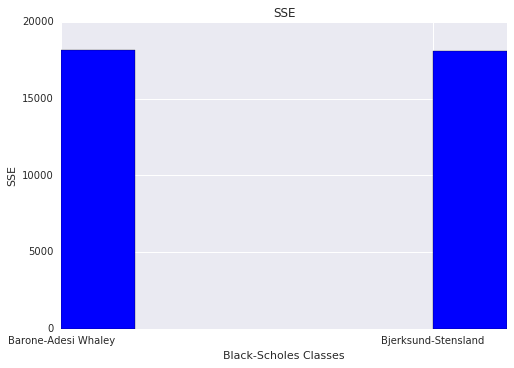

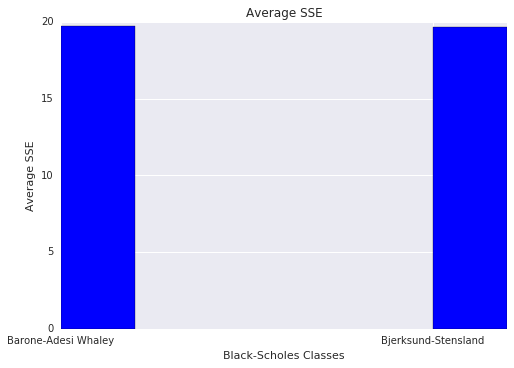

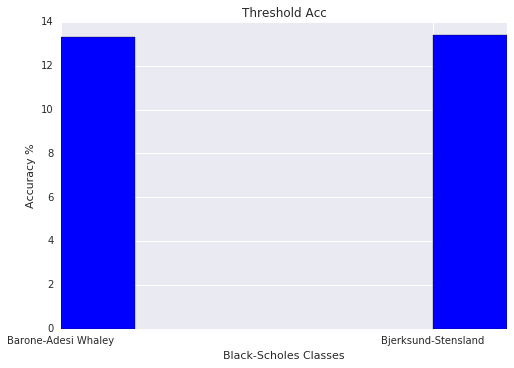

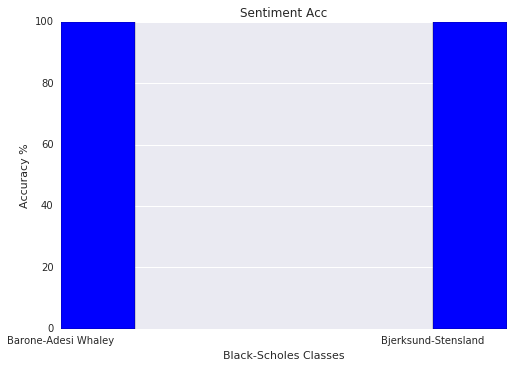

In [8]:
## set up for histograms
names = ()
sse = ()
avgSSE = ()
tAcc = ()
sAcc = ()
for i in range(len(bsNames)):
    names += (bsNames[i],)
    sse += (bsSSE[i],)
    avgSSE += (bsAvgSSE[i],)
    tAcc += (bsTAcc[i],)
    sAcc += (bsSAcc[i],)

width = 0.2
i = np.arange(len(bsNames))


## plot histogram for SSE
fig, plot = plt.subplots()
bar = plot.bar(i, sse, width, color='b')
plot.set_title('SSE')
plot.set_xlabel('Black-Scholes Classes')
plot.set_ylabel('SSE')
plot.set_xticklabels(names)
plot.set_xticks(i)
plt.show()

## plot histogram for Average SSE
fig, plot = plt.subplots()
bar = plot.bar(i, avgSSE, width, color='b')
plot.set_title('Average SSE')
plot.set_xlabel('Black-Scholes Classes')
plot.set_ylabel('Average SSE')
plot.set_xticklabels(names)
plot.set_xticks(i)
plt.show()

## plot histogram for threshold accuracy
fig, plot = plt.subplots()
bar = plot.bar(i, tAcc, width, color='b')
plot.set_title('Threshold Acc')
plot.set_xlabel('Black-Scholes Classes')
plot.set_ylabel('Accuracy %')
plot.set_xticklabels(names)
plot.set_xticks(i)
plt.show()

#plot histogram for sentiment accuracy
fig, plot = plt.subplots()
bar = plot.bar(i, sAcc, width, color='b')
plot.set_title('Sentiment Acc')
plot.set_xlabel('Black-Scholes Classes')
plot.set_ylabel('Accuracy %')
plot.set_xticklabels(names)
plot.set_xticks(i)
plt.show()

<b>binomial accuracies</b>

In [9]:
## create lists to run accuracy functions on
binNames = ['Cox-Ross-Rubenstein', 'Jarrow-Rudd', 'Equal Probabilities','Trigeorgis','Tian','Leisen-Reimer']
binReal = []
binEstimates = []
binSSE = []
binAvgSSE = []
binTAcc = []
binSAcc = []

## Cox-Ross-Rubenstein 
coxReal, coxEstimates = af.getRealEstimates(simPutsDict, 5)
binReal.append(coxReal)
binEstimates.append(coxEstimates)


## Jarrow-Rudd 
jarrowReal, jarrowEstimates = af.getRealEstimates(simPutsDict, 6)
binReal.append(jarrowReal)
binEstimates.append(jarrowEstimates)


## Equal Probabilities 
equalReal, equalEstimates = af.getRealEstimates(simPutsDict, 7)
binReal.append(equalReal)
binEstimates.append(equalEstimates)

## Trigeorgis 
trigeorgisReal, trigeorgisEstimates = af.getRealEstimates(simPutsDict, 8)
binReal.append(trigeorgisReal)
binEstimates.append(trigeorgisEstimates)


## Tian 
tianReal, tianEstimates = af.getRealEstimates(simPutsDict, 9)
binReal.append(tianReal)
binEstimates.append(tianEstimates)


## Leisen-Reimer 
leisenReal, leisenEstimates = af.getRealEstimates(simPutsDict, 10)
binReal.append(leisenReal)
binEstimates.append(leisenEstimates)

## run accuracy functions on real and estimate prices
epsilon = 0.1
for i in range(len(binNames)):
    print(binNames[i])
    binSSE.append(af.sse(binEstimates[i], binReal[i]))
    binAvgSSE.append(af.avgSSE(binEstimates[i], binReal[i]))
    binTAcc.append(af.thresholdAcc(binEstimates[i], binReal[i], epsilon))
    binSAcc.append(af.sentimentAcc(binEstimates[i], binReal[i]))
    print("sse:",binSSE[i])
    print("avg sse:",binAvgSSE[i])
    print("threshold acc:", binTAcc[i],"%")
    print("sentiment acc:", binSAcc[i],"%\n")

IndexError: tuple index out of range

#### Visualizations for Binomial Accuracies

In [ ]:
## set up for histograms
names = ()
sse = ()
avgSSE = ()
tAcc = ()
sAcc = ()
for i in range(len(binNames)):
    names += (binNames[i],)
    sse += (binSSE[i],)
    avgSSE += (binAvgSSE[i],)
    tAcc += (binTAcc[i],)
    sAcc += (binSAcc[i],)

width = 0.2
i = np.arange(len(binNames))


## plot histogram for SSE
fig, plot = plt.subplots()
bar = plot.bar(i, sse, width, color='b')
plot.set_title('SSE')
plot.set_xlabel('Binomial Classes')
plot.set_ylabel('SSE')
plot.set_xticklabels(names,rotation='vertical')
plot.set_xticks(i)
plt.show()

## plot histogram for Average SSE
fig, plot = plt.subplots()
bar = plot.bar(i, avgSSE, width, color='b')
plot.set_title('Average SSE')
plot.set_xlabel('Binomial Classes')
plot.set_ylabel('Average SSE')
plot.set_xticklabels(names, rotation='vertical')
plot.set_xticks(i)
plt.show()

## plot histogram for threshold Accuracy
fig, plot = plt.subplots()
bar = plot.bar(i, tAcc, width, color='b')
plot.set_title('Threshold Acc')
plot.set_xlabel('Binomial Classes')
plot.set_ylabel('Accuracy %')
plot.set_xticklabels(names, rotation='vertical')
plot.set_xticks(i)
plt.show()

## plot histogram for sentiment Accuracy
fig, plot = plt.subplots()
bar = plot.bar(i, sAcc, width, color='b')
plot.set_title('Sentiment Acc')
plot.set_xlabel('Binomial Classes')
plot.set_ylabel('Accuracy %')
plot.set_xticklabels(names, rotation='vertical')
plot.set_xticks(i)
plt.show()

### Analysis for Question 1

Based on the results above, the accuracies for the for Black-Scholes and Binomial classes seem very similiar. The sum squared error for all of them seems to be around 76,097. The average sum squared error also seems to be around 10.63. The threshold accuracy for all of them seems to around 21% for an epsilon of 0.1. The sentiment accuracy for all the estimations seems to be around 30%. Based on these results there does not seem to be one class that is better than the other when it comes to estimating the real price of the put options. All these estimations seem to general have the same amount of error.

#### Question 2: Short term accuracy
#### Which options pricing model is the most accurate in the short term?

#### Question 3: Long term accuracy
#### Which options pricing model is the most accurate in the long term?